# Análise exploratória e teste de hipótese do dataset pulmonary

Iremos analisar o dataset pulmonary que se encontra no pacote ICSNP da linguagem R. As seguintes hipóteses são feitas:

1 - Os dados seguem uma normal multivariada. <br>
2 - A média dos atributos são equivalentes antes e depois da exposição ao pó.

### Análise Univariada

In [1]:
# Carregando dataset
library(ICSNP)   
data(pulmonary)

#Apresentacao do dataset
head(pulmonary)

Loading required package: mvtnorm
Loading required package: ICS


FVC,FEV,CC
-0.11,-0.12,-4.3
0.02,0.08,4.4
-0.02,0.03,7.5
0.07,0.19,-0.3
-0.16,-0.36,-5.8
-0.42,-0.49,14.5


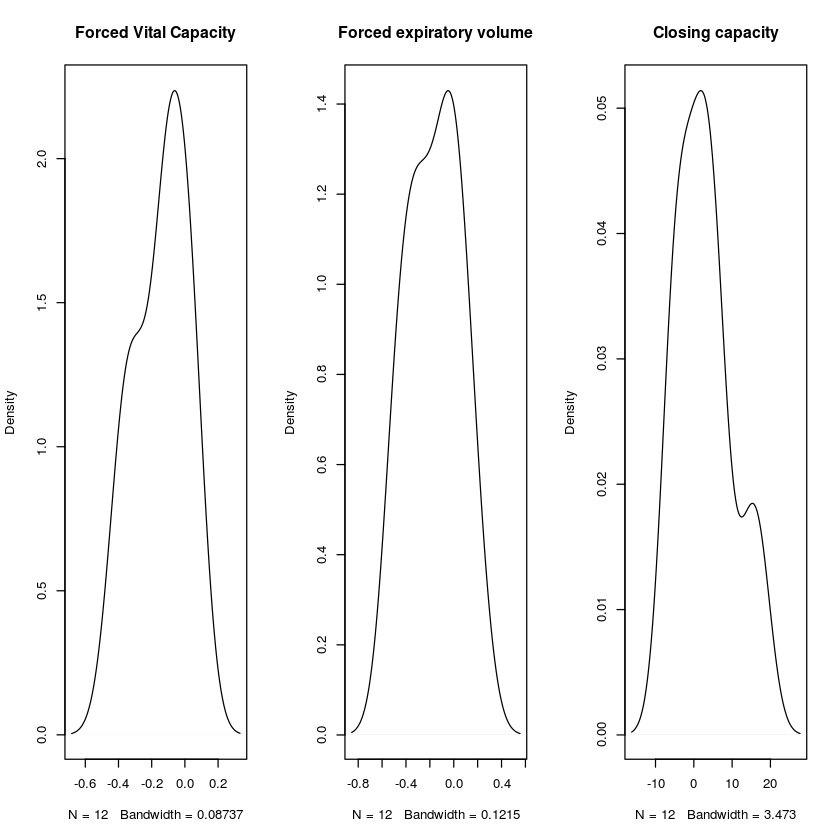

In [2]:
#Plotagem das densidades
par(mfrow=c(1,3))
plot(density(pulmonary$FVC),main="Forced Vital Capacity")
plot(density(pulmonary$FEV),main="Forced expiratory volume")
plot(density(pulmonary$CC),main="Closing capacity")

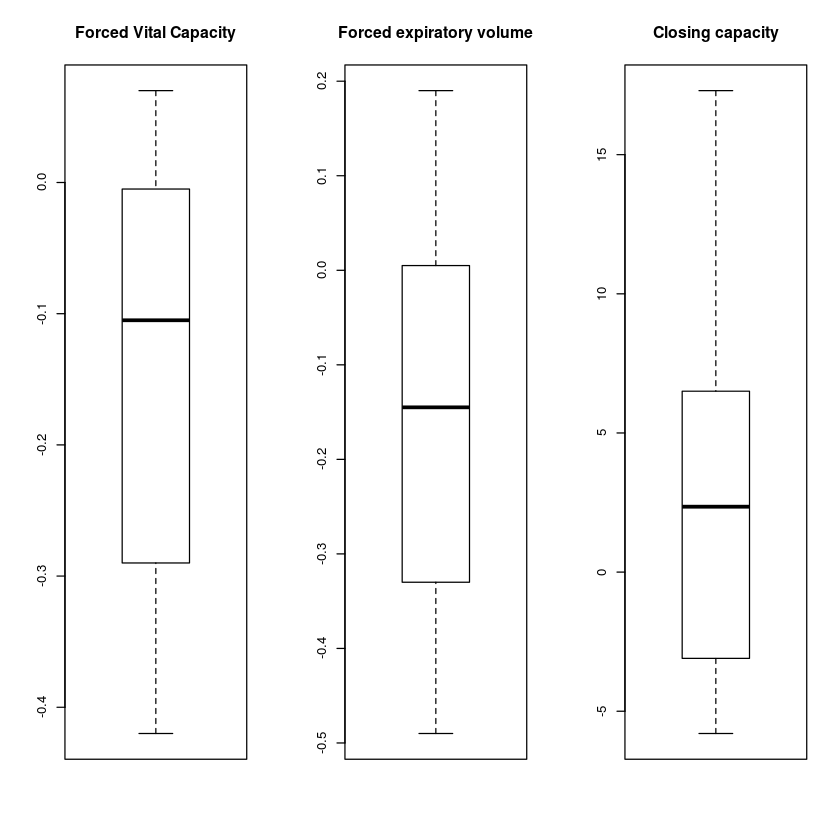

In [3]:
#Plotagem dos boxplots
par(mfrow=c(1,3))
boxplot(pulmonary$FVC,main="Forced Vital Capacity")
boxplot(pulmonary$FEV,main="Forced expiratory volume")
boxplot(pulmonary$CC,main="Closing capacity")

In [4]:
#Verificando se os atributos possuem aproximadamente 95% dos dados no range [mean-2*sd,mean+2*sd]
minimum_interval = mean(pulmonary$FVC) - (2 * sd(pulmonary$FVC))
maximum_interval = mean(pulmonary$FVC) + (2 * sd(pulmonary$FVC))
proportion = length(pulmonary$FVC[pulmonary$FVC > minimum_interval & pulmonary$FVC < maximum_interval]) / length(pulmonary$FVC)
cat("Proportion of FVC:",proportion,"\n")


minimum_interval = mean(pulmonary$FEV) - (2 * sd(pulmonary$FEV))
maximum_interval = mean(pulmonary$FEV) + (2 * sd(pulmonary$FEV))
proportion = length(pulmonary$FEV[pulmonary$FEV > minimum_interval & pulmonary$FEV < maximum_interval]) / length(pulmonary$FEV)
cat("Proportion of FEV:",proportion,"\n")

minimum_interval = mean(pulmonary$CC) - (2 * sd(pulmonary$CC))
maximum_interval = mean(pulmonary$CC) + (2 * sd(pulmonary$CC))
proportion = length(pulmonary$CC[pulmonary$CC > minimum_interval & pulmonary$CC < maximum_interval]) / length(pulmonary$CC)
cat("Proportion of CC:",proportion)

Proportion of FVC: 1 
Proportion of FEV: 1 
Proportion of CC: 1

Dado o formato das densidades produzidas, dos boxplots e da análise intervalar nós não temos fortes evidências de que os atributos não seguem uma distribuição normal. Pelo gráfico das densidades e pelo boxplot podemos ver que a forma se assemalha com a da normal, havendo uma certa simetria e sem um achatamento muito elevado. Pela análise intervalar não foi possível verificar nada de certo pelo fato de haver poucos dados.

### Análise Bivariada

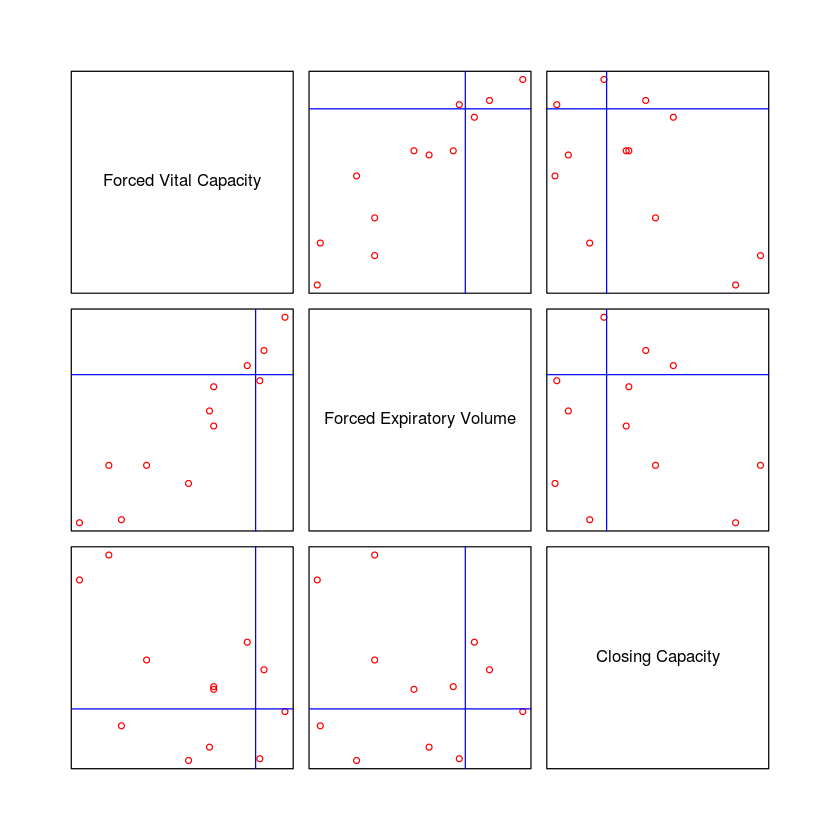

In [5]:
#Plotar gráfico de dispersão
measures <- pulmonary[,c("FVC","FEV","CC")]
names(measures) <- c("Forced Vital Capacity", "Forced Expiratory Volume","Closing Capacity")
plotfun <- function(x,y,...){
    points(x,y,...) 
    abline(h = 0, col="blue") 
    abline(v = 0, col="blue") 
}
main="Gráficos de dispersão de comparação de pares"
pairs(measures, xaxt="n", yaxt="n", col="red", panel=plotfun)

In [6]:
#Testar dados para ver se encaixam em uma distribuição normal bivariada
cor(measures)
test = HotellingsT2(measures)
qf(0.01, 3, 44, lower.tail=F)

,Forced Vital Capacity,Forced Expiratory Volume,Closing Capacity
Forced Vital Capacity,1.0000000,0.9269397,-0.5339726
Forced Expiratory Volume,0.9269397,1.0000000,-0.2390159
Closing Capacity,-0.5339726,-0.2390159,1.0000000


[1] 4.260643

Pelos gráficos de dispersão e pela matriz de correlação verificamos que certos atributos possuem uma certa semelhança com a normal bivariada. O maior problema ocorre entre os atributos CC e FEV na qual sua nuvem de pontos não parece se assemelhar muito com uma elipse

## Os dados seguem uma normal multivariada ?

Pelo fato de não haver tantos dados é díficil de se obter informações precisas. De qualquer forma, segundo nossas análises não há evidências fortes de que o dataset não siga uma normal multivariada

### T2 de Hotelling

In [7]:
#Teste de hipotese
HotellingsT2(pulmonary)


	Hotelling's one sample T2-test

data:  pulmonary
T.2 = 3.8231, df1 = 3, df2 = 9, p-value = 0.05123
alternative hypothesis: true location is not equal to c(0,0,0)


In [8]:
#Intervalo de confiança
n = nrow(pulmonary)
p = ncol(pulmonary)

#IC para cada atributo
cte = sqrt((((n-1)*p)/(n-p)) * qf(p=0.05,df1=n,df2=n-p,lower.tail=FALSE))
for (i in 1:3){
    minimum = colMeans(pulmonary)[i] - (cte * var(pulmonary)[i,i])
    maximum = colMeans(pulmonary)[i] + (cte * var(pulmonary)[i,i])
    cat("IC (",names(pulmonary)[i],"): [",minimum,",",maximum,"]\n")
}

IC ( FVC ): [ -0.2304739 , -0.05952607 ]
IC ( FEV ): [ -0.3304246 , 0.0004245572 ]
IC ( CC ): [ -181.8263 , 187.8263 ]


### A média dos atributos são equivalentes antes e depois da exposição ao pó

Note pelo teste de hipótese T2 de Hotelling e pelos IC's que não devemos rejeitar a hipótese de que a média dos atributos são equivalentes. Logo, podemos concluir que mesmo com a exposição ao pó não afeta os trabalhadores para os atributos escolhidos.